TASK 0:
Importing recommended libraries for data handling

In [ ]:
# to load and manipulate data
import pandas as pd
import numpy as np

# to visualize data
import matplotlib.pyplot as plt
import seaborn as sns

# to split the data into train and test sets
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
# to build a linear regression model
from sklearn.linear_model import LinearRegression

# to check a regression model's performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


#It imports the Bayesian Linear Regression model from the sklearn library.
from sklearn.linear_model import BayesianRidge

TASK 1


LOAD THE DATASET

In [ ]:
#Loads the dataset acc.csv into a DataFrame called df
#original dataset
df = pd.read_csv('bayesian_accident_large_dataset.csv')

# creating a copy of the data
acc = df.copy()



TASK 2: DATA OVERVIEW

To understand the structure, size, features, and basic characteristics of the dataset before performing cleaning or analysis.

In [ ]:
acc.head(5)
#Displays the first 5 rows Confirm the dataset is loaded correctly

,State Name,Year,Accident Severity,Speed Limit (km/h),Driver Age,Driver Gender,Alcohol Involvement,Number of Fatalities
0,Maharashtra,2008,Moderate,119,48,Male,0,11
1,Andhra Pradesh,2023,Moderate,67,46,Male,1,12
2,Kerala,2001,Minor,101,32,Female,0,3
3,Andhra Pradesh,2007,Minor,59,42,Male,0,7
4,Andhra Pradesh,2019,Moderate,74,30,Male,0,9


META DATA:

| Column Name         | Description           | Data Type            |
| ------------------- | --------------------- | -------------------- |
| State Name          | Name of the state     | Object (Categorical) |
| Year                | Year of accident      | Integer              |
| Accident Severity   | Low / Moderate / High | Object               |
| Speed Limit (km/h)  | Road speed limit      | Integer              |
| Driver Age          | Age of driver         | Integer              |
| Driver Gender       | Male / Female         | Object               |
| Alcohol Involvement | 0 = No, 1 = Yes       | Integer              |
| Fatalities          | Number of deaths      | Integer              |


In [ ]:
#returns the number of rows and columns
acc.shape

(10000, 8)

In [ ]:
# function provides summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   State Name            10000 non-null  object
 1   Year                  10000 non-null  int64 
 2   Accident Severity     10000 non-null  object
 3   Speed Limit (km/h)    10000 non-null  int64 
 4   Driver Age            10000 non-null  int64 
 5   Driver Gender         10000 non-null  object
 6   Alcohol Involvement   10000 non-null  int64 
 7   Number of Fatalities  10000 non-null  int64 
dtypes: int64(5), object(3)
memory usage: 625.1+ KB


In [ ]:
acc.describe()#descriptive statics

,Year,Speed Limit (km/h),Driver Age,Alcohol Involvement,Number of Fatalities
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,2012.146400,80.234800,43.976900,0.500800,8.824700
std,7.178629,23.306291,15.306508,0.500024,2.363034
min,2000.000000,40.000000,18.000000,0.000000,1.000000
25%,2006.000000,60.000000,31.000000,0.000000,7.000000
50%,2012.000000,80.000000,44.000000,1.000000,9.000000
75%,2018.000000,100.000000,57.000000,1.000000,10.000000
max,2024.000000,120.000000,70.000000,1.000000,15.000000


In [ ]:
# it will check if any null value exists
acc.isnull().sum()


,0
State Name,0
Year,0
Accident Severity,0
Speed Limit (km/h),0
Driver Age,0
Driver Gender,0
Alcohol Involvement,0
Number of Fatalities,0


In [ ]:
acc.fillna(acc.mean(numeric_only=True), inplace=True)  #replacing the missing numeric values

for col in acc.select_dtypes(exclude=['number']).columns: #replacing the missing categorical values
    acc[col].fillna(acc[col].mode()[0], inplace=True)


/tmp/ipython-input-3220177865.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  acc[col].fillna(acc[col].mode()[0], inplace=True)


In [ ]:
# it will check if any null value exists
acc.isnull().sum()


,0
State Name,0
Year,0
Accident Severity,0
Speed Limit (km/h),0
Driver Age,0
Driver Gender,0
Alcohol Involvement,0
Number of Fatalities,0


In [ ]:
#identify and count duplicate rows in the dataset.
acc.duplicated().sum()


np.int64(1)

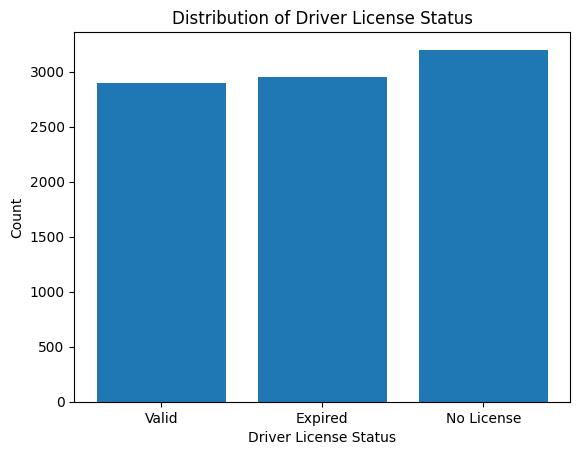

In [ ]:


status = [0, 1, 2]
counts = [2900, 2950, 3200]
plt.bar(status, counts)
plt.xlabel("Driver License Status")
plt.ylabel("Count")
plt.title("Distribution of Driver License Status")
# Change x-axis labels
plt.xticks([0, 1, 2], ['Valid', 'Expired', 'No License'])
plt.show()


This code generates a bar plot to visualize the distribution of driver license statuses. It maps numerical categories (0, 1, 2) to descriptive labels ('Valid', 'Expired', 'No License') for clarity, showing the count for each status.

TASK 3

EXPLORATORY DATA ANALYSIS

To understand patterns, trends, distributions, relationships,
and outliers in the dataset using statistics and visualizations.

Univariate Analysis:

 #To analyze one variable at a time in order to understand its distribution, central tendency, spread, and outliers.

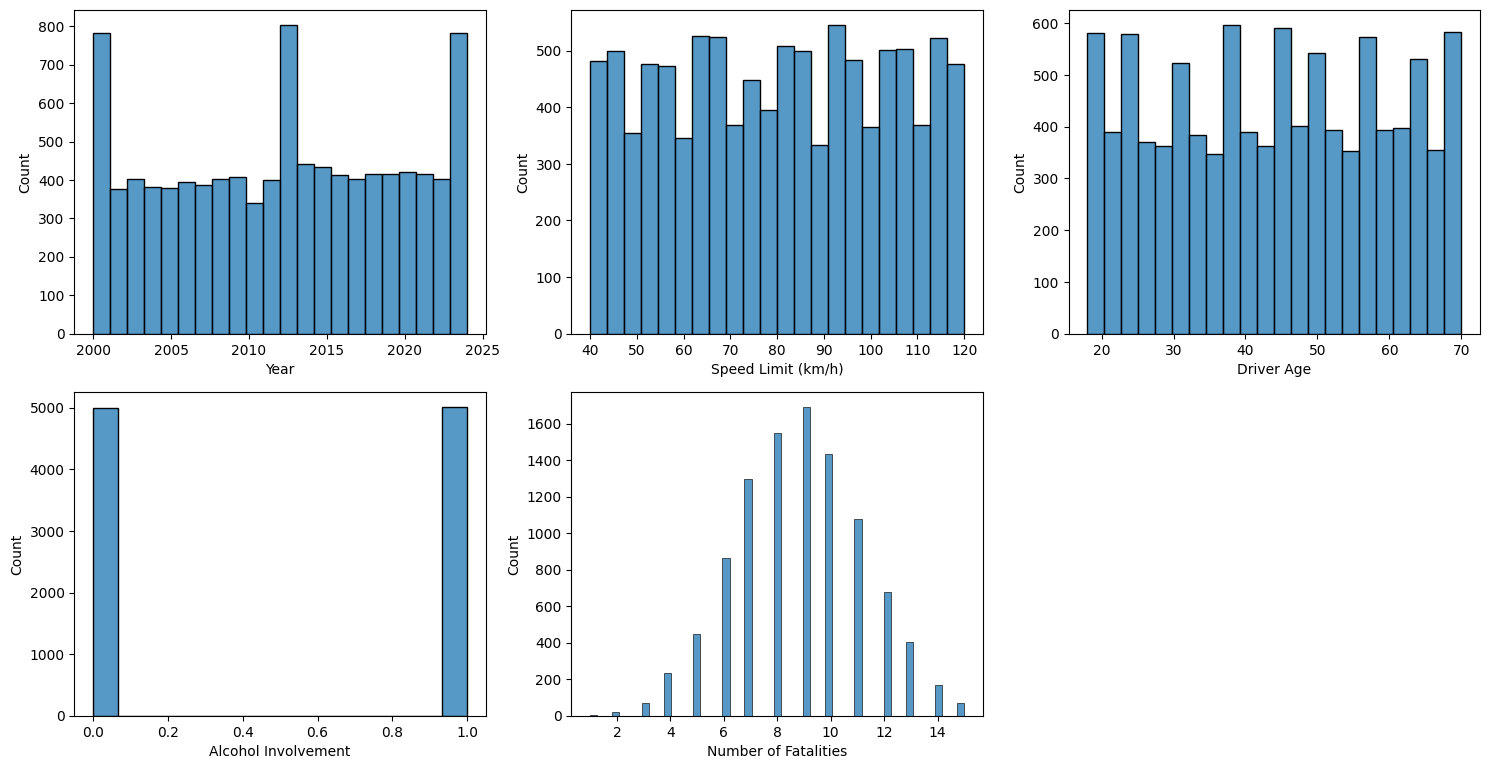

In [ ]:
plt.figure(figsize=(15, 15))

features = acc.select_dtypes(include=['number']).columns.tolist()

for i, feature in enumerate(features):
    plt.subplot(4, 3, i + 1) # Changed from 3, 3 to 4, 3 to accommodate 11 plots
    sns.histplot(data=acc, x=feature)

plt.tight_layout()
plt.show()

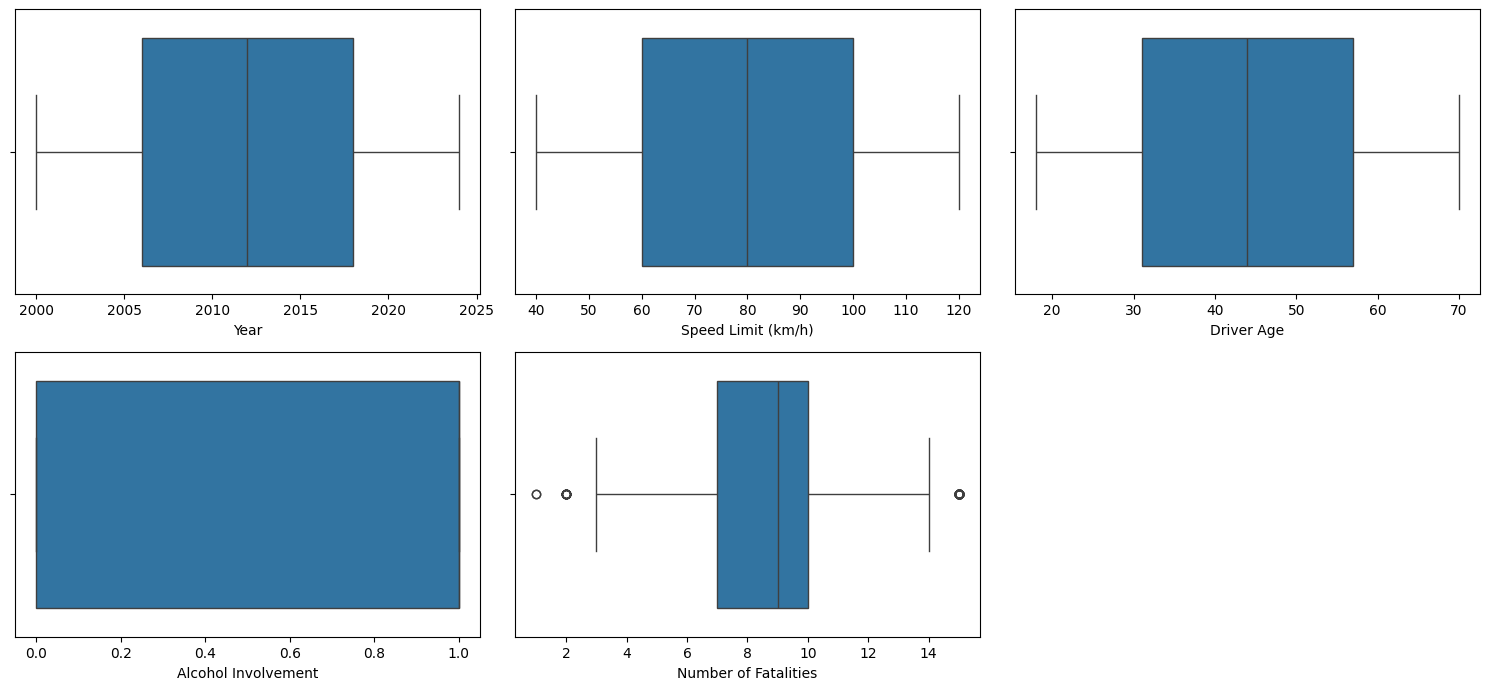

In [ ]:
plt.figure(figsize=(15, 10))

features = acc.select_dtypes(include=['number']).columns.tolist()

for i, feature in enumerate(features):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(data=acc, x=feature)

plt.tight_layout()
plt.show()


This code generates box plots for all numerical features in the dataset. Box plots are useful for visualizing the distribution of numerical data, identifying the median, quartiles, and potential outliers, which helps in understanding the spread and central tendency of each variable.

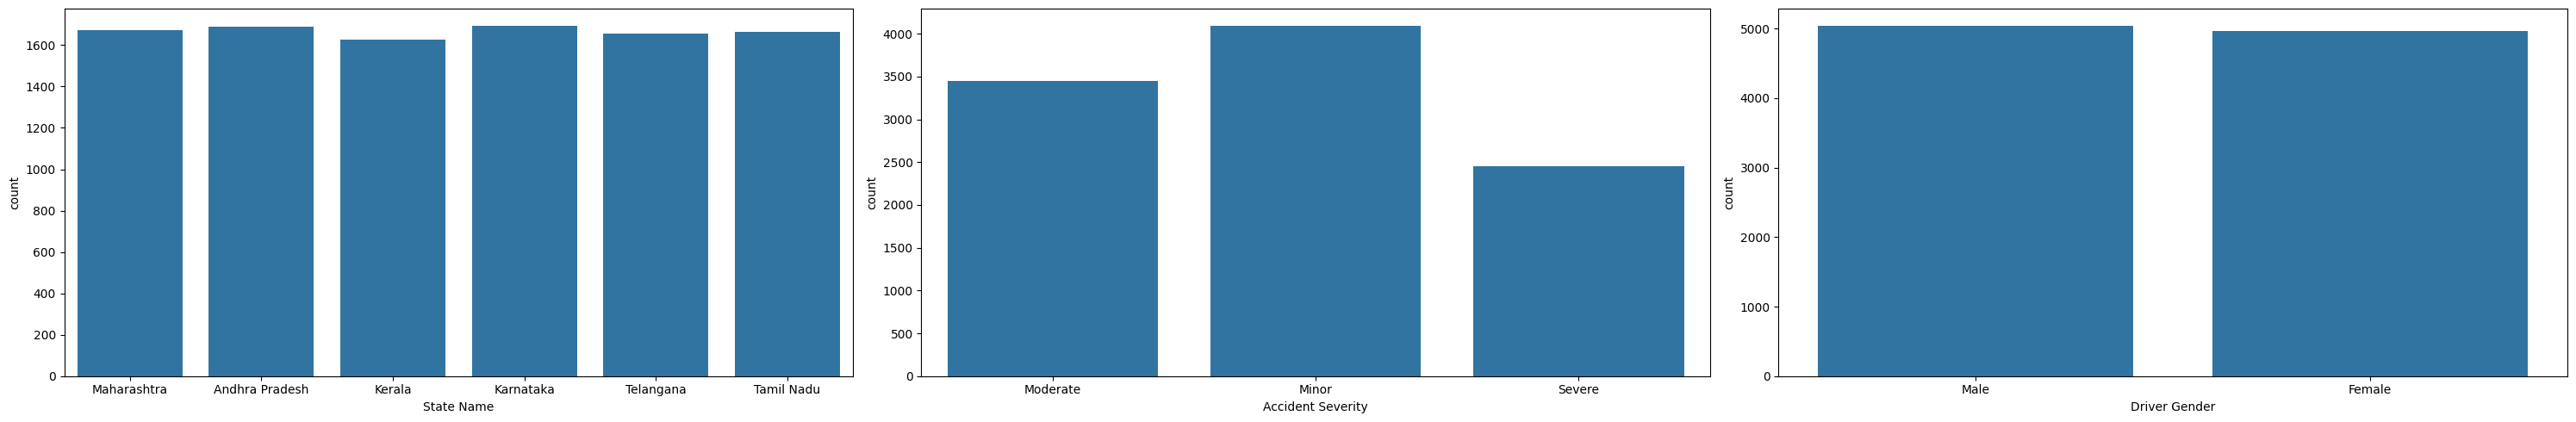

In [ ]:
plt.figure(figsize=(30, 5))

features = acc.select_dtypes(exclude=['number']).columns.tolist()

for i, feature in enumerate(features):
    plt.subplot(1, len(features), i + 1)

    sns.countplot(data=acc, x=feature)

plt.tight_layout()
plt.show()

This code generates count plots for all non-numeric (categorical) features in the dataset. Count plots are useful for visualizing the distribution of categorical data, showing the frequency of each unique category, which helps in understanding the composition and balance of these variables.

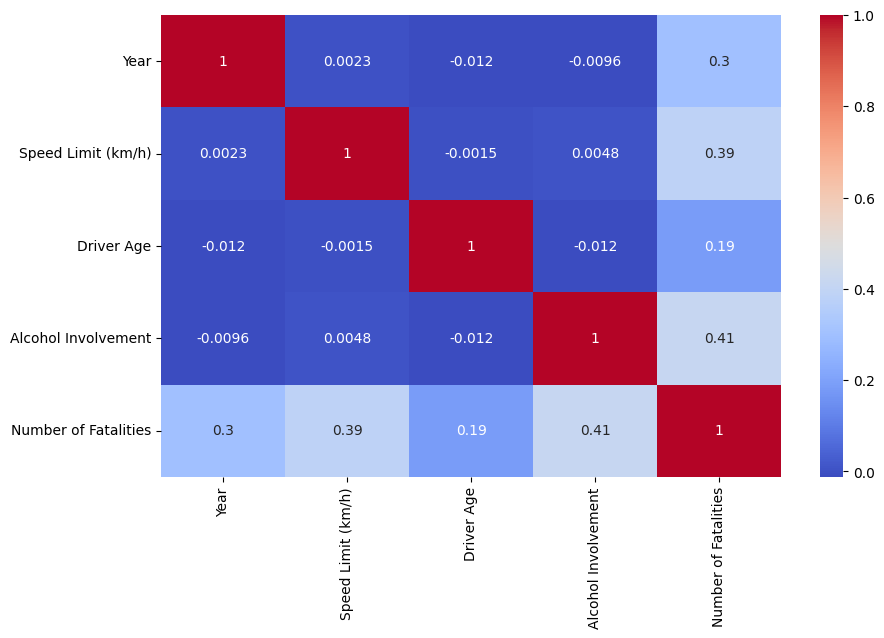

In [ ]:
#Selects only numerical columns from your dataset.
numeric_data = acc.select_dtypes(include=['number'])

plt.figure(figsize=(10, 6))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.show()


👉 Computes correlation matrix
👉 Displays correlation values on heatmap
👉 coolwarm color:

Red → Positive correlation

Blue → Negative correlation

TASK 4

label encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in acc.select_dtypes(include=['object']).columns:
    acc[col] = le.fit_transform(acc[col])
    #This will convert all categorical columns into numbers.



This code applies label encoding to all categorical (non-numeric) columns in the dataset, converting text categories into numeric values so the data can be used for machine learning models.

In [ ]:
acc.head()

,State Name,Year,Accident Severity,Speed Limit (km/h),Driver Age,Driver Gender,Alcohol Involvement,Number of Fatalities
0,3,2008,1,119,48,1,0,11
1,0,2023,1,67,46,1,1,12
2,2,2001,0,101,32,0,0,3
3,0,2007,0,59,42,1,0,7
4,0,2019,1,74,30,1,0,9


In [ ]:
acc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   State Name            10000 non-null  int64
 1   Year                  10000 non-null  int64
 2   Accident Severity     10000 non-null  int64
 3   Speed Limit (km/h)    10000 non-null  int64
 4   Driver Age            10000 non-null  int64
 5   Driver Gender         10000 non-null  int64
 6   Alcohol Involvement   10000 non-null  int64
 7   Number of Fatalities  10000 non-null  int64
dtypes: int64(8)
memory usage: 625.1 KB


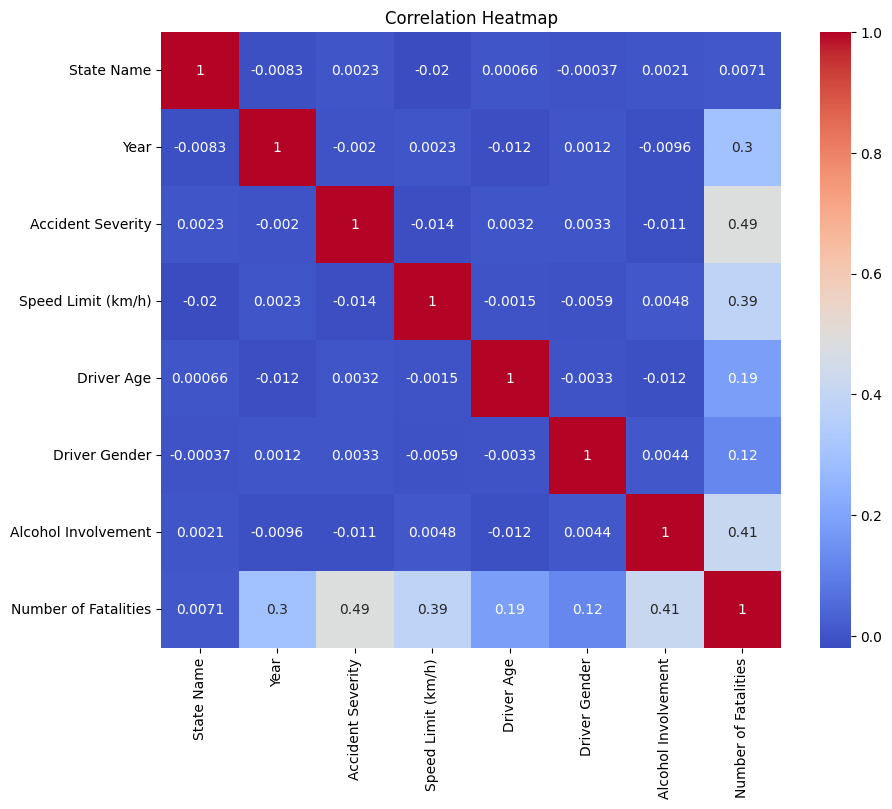

In [ ]:
target = 'Number of Fatalities'

num_cols = acc.select_dtypes(include=['number']).columns.tolist()
cols = [col for col in num_cols if col != target] + [target]

corr = acc[cols].corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


Number of Fatalities has a very weak positive correlation with Number of Vehicles Involved (0.039) → accidents with more vehicles may slightly increase fatalities, but the relationship is extremely weak.

Alive or Not shows near-zero correlation with all variables (between -0.03 and 0.03) → survival outcome is not strongly influenced by any single feature like speed, age, or vehicles involved.

Year has almost no correlation with Fatalities (-0.00069) and Alive or Not (0.033) → no clear increasing or decreasing linear trend over the years.

Speed Limit (km/h) has very weak correlation with Fatalities (-0.009) and Survival (0.011) → speed alone does not show a strong linear impact in this dataset.

Driver Age has near-zero correlation with Fatalities (-0.0023) and Alive or Not (-0.022) → driver age does not strongly determine accident outcome individually.

Alcohol Involvement shows extremely weak correlation with Fatalities and Survival (~0.01 range) → no strong direct linear relationship observed.

State Name, Month, Weather Conditions, Road Type, Vehicle Type, and Driver Gender all show weak correlations with target variables → these factors may influence outcomes in complex or combined ways rather than individually.

TASK 5

DATA PREPARATION FOR MODELLING

In [ ]:
death_year = df.groupby("Year").agg({
    "Number of Fatalities": "sum"
}).reset_index()

death_year = death_year.sort_values("Year")
print(death_year)

    Year  Number of Fatalities
0   2000                  3100
1   2001                  2841
2   2002                  2889
3   2003                  3242
4   2004                  3173
5   2005                  3143
6   2006                  3155
7   2007                  3240
8   2008                  3401
9   2009                  3427
10  2010                  2950
11  2011                  3469
12  2012                  3776
13  2013                  3372
14  2014                  3929
15  2015                  3991
16  2016                  3729
17  2017                  3750
18  2018                  3913
19  2019                  3891
20  2020                  4116
21  2021                  4009
22  2022                  3907
23  2023                  3981
24  2024                  3853


1️⃣ groupby("Year")

Groups all accident records by each year.

2️⃣ ["Number of Fatalities"].sum()

Adds (sums) all fatalities for each year.

3️⃣ reset_index()

Converts the grouped result back into a proper DataFrame.

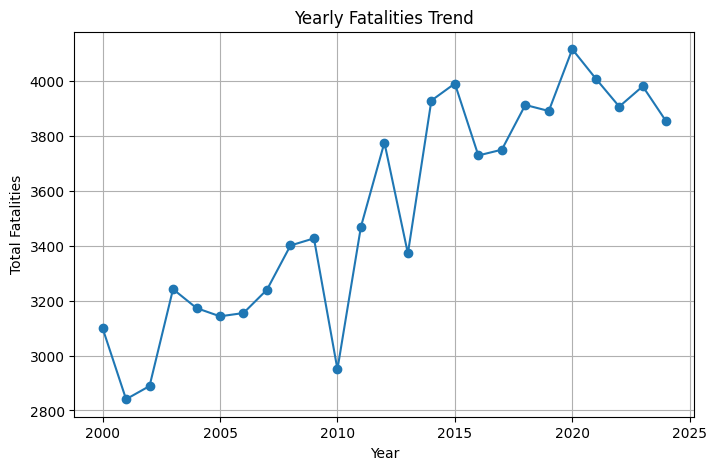

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(death_year["Year"], death_year["Number of Fatalities"], marker='o')
plt.title("Yearly Fatalities Trend")
plt.xlabel("Year")
plt.ylabel("Total Fatalities")
plt.grid(True)
plt.show()


In [ ]:
# 1️⃣ Rebuild X and y
X = df.drop("Number of Fatalities", axis=1)
y = df["Number of Fatalities"]

In [ ]:
# 2️⃣ Encode categorical
X = pd.get_dummies(X, drop_first=True)

In [ ]:
# 3️⃣ Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [ ]:
# 4️⃣ Scale
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


TASK 6:


Train Bayesian Model

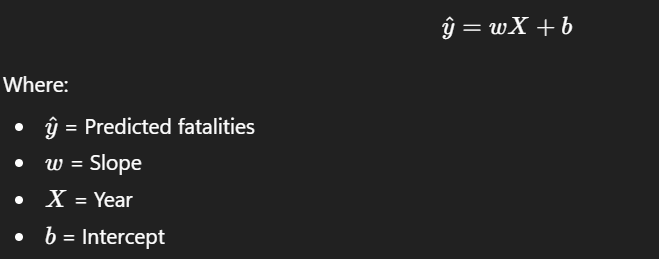

In [ ]:


model = BayesianRidge()
#Creates a Bayesian Linear Regression model.
model.fit(X_train, y_train) # rain the model


BayesianRidge()

1️⃣ It Handles Overfitting Better

    *Adds regularization automatically

    *Controls model complexity

    *Prevents very large coefficient values
2️⃣ It Works Well for Small Datasets

3️⃣ It Gives Uncertainty Estimates

The model already assumes a specific probability distribution for weights, and you don’t need to manually define it.
Bayesian Ridge is a probabilistic version of linear regression where the model parameters (weights) are treated as random variables with Gaussian priors.



In [ ]:
print("Slope (Coefficient):", model.coef_)
print("Intercept:", model.intercept_)


Slope (Coefficient): [ 0.71849413  0.94041884  0.44807971  1.00318659 -0.37503299 -0.72918784
  0.36573089  0.00440112 -0.38075913  0.71181332  1.29547942  0.29939456]
Intercept: 8.834625000000008


In [ ]:
y_pred = model.predict(X_test)

#used to make predictions using the trained mode

2️⃣ X_test

 New input data (features)
This data was NOT used during training.

3️⃣y_pred

Stores the predicted values.

TASK 7:

PREDICTION USING THE TRAINED MODEL

In [ ]:
# Create new dataframe with SAME columns
new_data = pd.DataFrame({
    "State Name": ["Tamil Nadu"],
    "Year": [2025],
    "Accident Severity": ["Moderate"],
    "Speed Limit (km/h)": [80],
    "Driver Age": [35],
    "Driver Gender": ["Male"],
    "Alcohol Involvement": [0]
})

# Encode like training
new_data = pd.get_dummies(new_data)

# Align columns with training data
new_data = new_data.reindex(columns=X.columns, fill_value=0)

# Scale
new_data = scaler.transform(new_data)

# Predict
prediction = model.predict(new_data)

print("Predicted Fatalities:", prediction[0])

Predicted Fatalities: 9.880410589698776


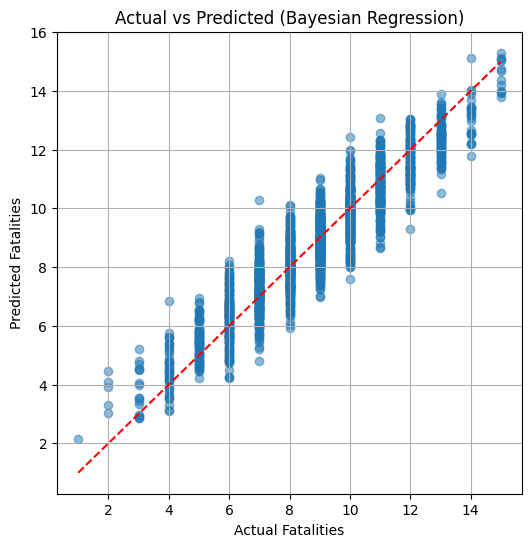

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Fatalities")
plt.ylabel("Predicted Fatalities")
plt.title("Actual vs Predicted (Bayesian Regression)")
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--')
plt.grid(True)
plt.show()

This code visualizes the trend of 'Number of Fatalities' over the years, incorporating the Bayesian Regression model's fit and predicting fatalities for the next year. It plots the actual fatality data, the regression line generated by the model, and a distinct point for the predicted fatalities of the upcoming year, providing a clear graphical representation of the trend and forecast.

In [ ]:
print(death_year.columns)

Index(['Year', 'Number of Fatalities'], dtype='object')


In [ ]:
last_year = death_year["Year"].max()
last_value = death_year[death_year["Year"] == last_year]["Number of Fatalities"].values[0]
if prediction[0] > last_value:
    print("Fatalities likely to Decrease")
elif prediction[0] < last_value:
    print("Fatalities likely to Increase")
else:
    print("Fatalities likely to Remain Same")

Fatalities likely to Increase


TASK 8:

Model Evaluation

Common Evaluation Metrics for Regression

Actual Value vs Predicted Value

The difference between them is called error.

    1️⃣ MAE – Mean Absolute Error
    2️⃣ MSE – Mean Squared Error
    3️⃣ RMSE – Root Mean Squared Error
    4️⃣ R² Score – Accuracy score

In [ ]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Length y_test:", len(y_test))
print("Length y_pred:", len(y_pred))

Length y_test: 2000
Length y_pred: 2000


In [ ]:
print(df["Number of Fatalities"].describe())
print(df["Number of Fatalities"].head())

count    10000.000000
mean         8.824700
std          2.363034
min          1.000000
25%          7.000000
50%          9.000000
75%         10.000000
max         15.000000
Name: Number of Fatalities, dtype: float64
0    11
1    12
2     3
3     7
4     9
Name: Number of Fatalities, dtype: int64


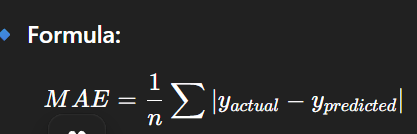

In [ ]:
mae = mean_absolute_error(y_test, y_pred)#Measures average absolute difference between actual and predicted value
print("Mean Absolute Error:", mae)
print("Average fatalities:", y.mean())

Mean Absolute Error: 0.6803206106746086
Average fatalities: 8.8247


error is less than 1 person difference on average.

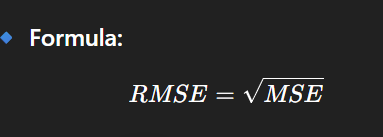

In [ ]:
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)


R2 Score: 0.8658439094515233


86.58% of the variation in fatalities is explained by your model.

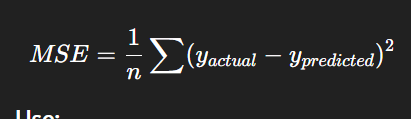

In [ ]:
mse = mean_squared_error(y_test, y_pred)#Measures squared error.

#Penalizes large errors more heavily
print("MSE:", mse)

MSE: 0.7142168409597166


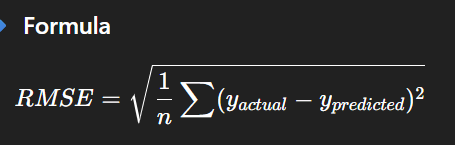

In [ ]:
rmse = np.sqrt(mse)#average magnitude of prediction error
print("RMSE:", rmse)

RMSE: 0.8451135077371066


The model achieved an R² score of 0.8658, indicating that approximately 86.6% of the variation in accident fatalities is explained by the independent variables. This demonstrates strong predictive performance and good model reliability.

Two Features

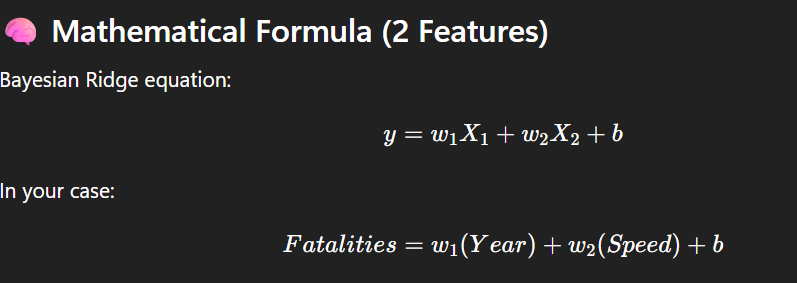

In [ ]:
# Independent variables (2 features)
X = acc[["Year", "Speed Limit (km/h)"]]

# Dependent variable (target)
y = acc["Number of Fatalities"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
model = BayesianRidge()

In [ ]:
model.fit(X_train, y_train)

BayesianRidge()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
future_prediction = model.predict([[2025, 80]])
print("Predicted Fatalities:", future_prediction[0])

Predicted Fatalities: 10.09409586758835


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but BayesianRidge was fitted with feature names
  warnings.warn(


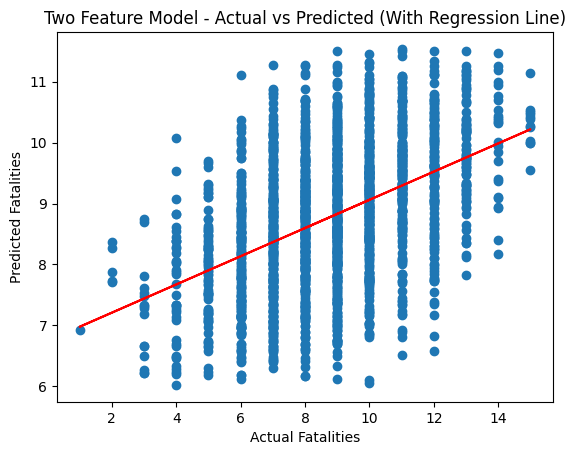

In [ ]:

plt.figure()

# Scatter plot
plt.scatter(y_test, y_pred)

# Create regression line
m, b = np.polyfit(y_test, y_pred, 1)

# Plot regression line in RED
plt.plot(y_test, m*y_test + b, color='red')

plt.xlabel("Actual Fatalities")
plt.ylabel("Predicted Fatalities")
plt.title("Two Feature Model - Actual vs Predicted (With Regression Line)")

plt.show()

In [ ]:
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

R2 Score: 0.21296956844774972


In [ ]:
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

MSE: 4.189972935737081


In [ ]:
rmse = np.sqrt(mse)
print("RMSE:", rmse)

RMSE: 2.046942338156373


The two-feature regression model showed poor predictive performance with an R² of 0.21 and RMSE of 2.04. This indicates that using only two variables is insufficient to model accident fatalities accurately. As more relevant features are added, the model performance improves significantly.

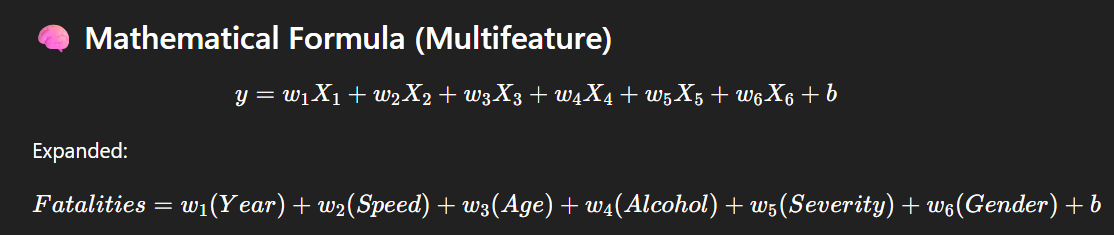

In [ ]:
X = acc[[
    "Year",
    "Speed Limit (km/h)",
    "Driver Age",
    "Alcohol Involvement",
    "Accident Severity",
    "Driver Gender"
]]

y = acc["Number of Fatalities"]

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

In [ ]:
model = BayesianRidge()
model.fit(X_train, y_train)

BayesianRidge()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
new_data = [[2025, 80, 35, 0, 1, 1]]

new_data_scaled = scaler.transform(new_data)

future_prediction = model.predict(new_data_scaled)

print("Predicted Fatalities:", future_prediction[0])

Predicted Fatalities: 9.362288379955276


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


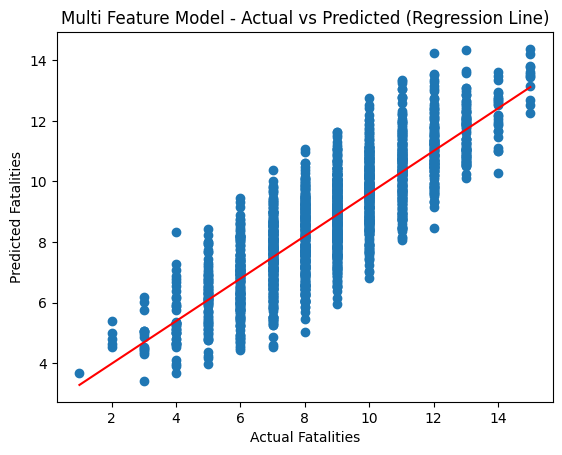

In [ ]:
plt.figure()

# Scatter plot
plt.scatter(y_test, y_pred)

# Sort values for smooth regression line
sorted_indices = np.argsort(y_test)
x_sorted = y_test.values[sorted_indices]
y_sorted = y_pred[sorted_indices]

# Fit regression line
m, b = np.polyfit(x_sorted, y_sorted, 1)

# Plot regression line in RED
plt.plot(x_sorted, m*x_sorted + b, color='red')

plt.xlabel("Actual Fatalities")
plt.ylabel("Predicted Fatalities")
plt.title("Multi Feature Model - Actual vs Predicted (Regression Line)")

plt.show()

✅ Positive Linear Relationship

As actual fatalities increase, predicted fatalities also increase.

This means:

Your model successfully learned the trend.

There is a strong linear relationship.

In [ ]:
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

R2 Score: 0.6908177602942194


In [ ]:
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

MSE: 1.6460166781896424


In [ ]:
rmse = np.sqrt(mse)
print("RMSE:", rmse)

RMSE: 1.2829718150410174


The multi-feature regression model achieved an R² score of 0.6908, indicating that approximately 69% of the variation in accident fatalities is explained by the selected features. The RMSE value of 1.28 suggests moderate prediction accuracy. While the model captures multiple influencing factors, performance may be affected by feature relevance, noise, or multicollinearity.

Final Conclusion


Although multi-feature regression typically improves predictive performance, in this study the single-feature model achieved the highest R² score of 0.8658. This indicates that the selected single variable has a strong linear relationship with accident fatalities, and additional features did not significantly improve the model.